# Catch crop diversity increases rhizosphere carbon input and soil microbial biomass

Norman Gentsch, Jens Boy, Juan Daniel Kennedy Batalla, Diana Heuermann, Nicolaus von Wirén, Dörte Schweneker, Ulf Feuerstein, Jonas Groß, Bernahrd Bauer, Barbara Reinhold-Hurek, Thomas Hurek, Fabricio Camacho Céspedes, Georg Guggenberger

Published: 2020-05-23

## Abstract
## Introduction
## Material and methods
## Results
## PLANT BIOMASS AND NET ECOSYSTEM EXCHANGE
The NEE decreased significantly with increasing catch crop diversity (Fig. 1), suggesting increasing $CO_2$-C uptake from the atmosphere.


[1] 1.213412e-01 1.674077e-03 1.136203e-08 4.873685e-01 3.522059e-04
[6] 4.824949e-02
attr(,"error")
[1] 0.0006776355

,Estimate,Std.Error,z.value,p.value
Mustard - Fallow,-186.3495,84.43544,-2.207006,1.211704e-01
Mix4 - Fallow,-306.1668,84.43544,-3.626046,1.721880e-03
Mix12 - Fallow,-524.1812,84.43544,-6.208071,1.395214e-09
Mix4 - Mustard,-119.8173,84.43544,-1.419041,4.873424e-01
Mix12 - Mustard,-337.8317,84.43544,-4.001066,4.124943e-04
Mix12 - Mix4,-218.0144,84.43544,-2.582025,4.819058e-02


Linear mixed model fit by REML ['lmerMod']
Formula: NEE ~ cc_variant + (1 | Date)
   Data: data

REML criterion at convergence: 103.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.77423 -0.38237  0.06762  0.50075  1.22368 

Random effects:
 Groups   Name        Variance Std.Dev.
 Date     (Intercept)  5292     72.75  
 Residual             10694    103.41  
Number of obs: 12, groups:  Date, 3

Fixed effects:
                  Estimate Std. Error t value
(Intercept)          41.22      73.00   0.565
cc_variantMustard  -186.35      84.44  -2.207
cc_variantMix4     -306.17      84.44  -3.626
cc_variantMix12    -524.18      84.44  -6.208

Correlation of Fixed Effects:
            (Intr) cc_vrM cc_vM4
cc_vrntMstr -0.578              
cc_varntMx4 -0.578  0.500       
cc_vrntMx12 -0.578  0.500  0.500

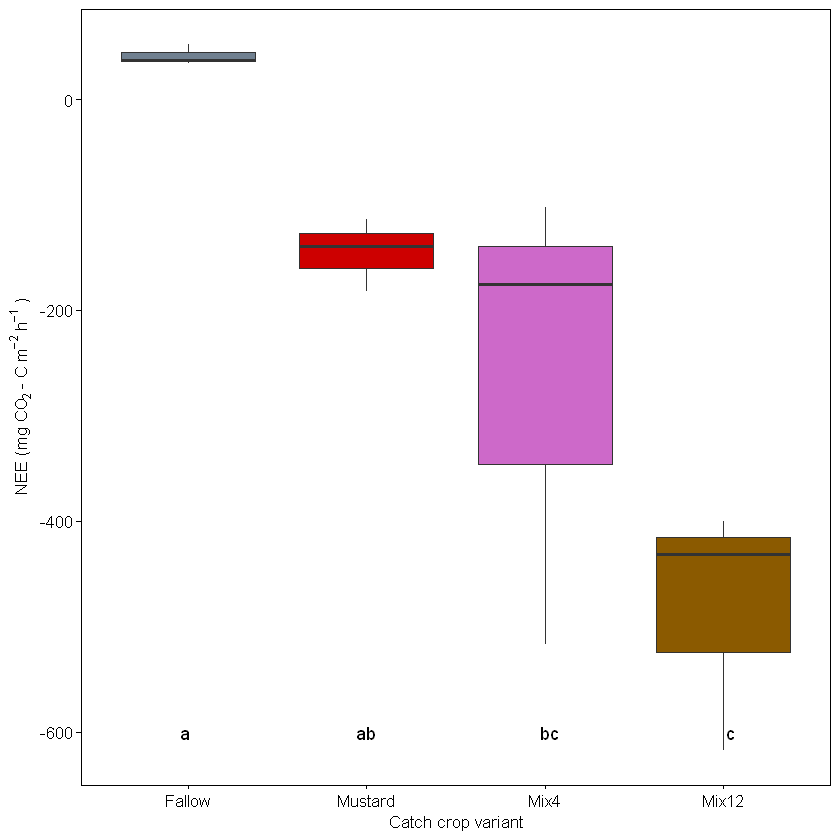

In [30]:
# written with R version 4.0.2 (2020-06-22) -- "Taking Off Again"
##------ Tue Oct 13 11:53:48 2020 ------##
# by Norman Gentsch

library(tidyverse)
library(lme4)
library(emmeans)
library(multcomp)

# set theme for ggplot
theme_set(theme_bw())
theme_myBW <- theme(axis.title.x = element_text(size = 10, color = "black"), 
                    axis.title.y = element_text(angle = 90, vjust = 1.5, size = 10, color = "black"),
                    axis.text.x = element_text(size = 10, color = "black"), 
                    axis.text.y = element_text(size = 10, color = "black"), 
                    axis.ticks =element_line(colour="black"),
                    strip.text.x = element_text(size = 10, color = "black"),
                    strip.background = element_blank(),
                    panel.border =element_rect(colour="black", fill=NA), 
                    panel.grid.major = element_blank(),
                    panel.grid.minor = element_blank(),
                    plot.title = element_text(size = 12, hjust=0.5),
                    #legend.position=c(0.0,1.0), 
                    #legend.justification=c(0,1), 
                    legend.text = element_text(size = 10),
                    legend.text.align=0,
                    legend.title =  element_text(size = 10), 
                    legend.key = element_rect(colour="white", fill = "white"),
                    legend.key.size = unit(5, "mm"),
                    legend.background = element_blank())


# set vector with colors and label
COL <- c("Fallow" = "slategray", "Mustard" = "red3" , "Mix4" = "orchid3", "Mix12"= "orange4")
SHP <- c("Fallow"=21,"Mustard"=22,"Mix4"=23, "Mix12"=24)


# generate data frame with original data
data <- data.frame(cc_variant = structure(c(1L, 1L, 1L, 3L, 4L, 2L, 3L, 4L, 2L, 2L, 4L, 3L), .Label = c("Fallow", "Mustard", "Mix4", "Mix12"), class = "factor"),
                   Date = structure(c(17092, 17093, 17098, 17092, 17092, 17092, 17093, 17093, 17093, 17098, 17098, 17098), class = "Date"),
                   NEE = c(52.3186092, 36.752742, 34.590816, -516.868370737168, -617.110003978854, -182.24567563611, -102.63776100067, -431.558870280712, -139.041211720174, -114.099387563412, -400.212603947375, -175.332083704246)
)


lm_NEE <- lmer(NEE ~ cc_variant + (1|Date), data=data)
df_NEE <- cld(emmeans(lm_NEE, specs ="cc_variant"), Letters=letters, sort=FALSE)

# summary table for 
sum.lm <- glht(lm_NEE, linfct = mcp(cc_variant = "Tukey"))
summary(sum.lm)$test$pvalue


glht.table <- function(x) {
  pq <- summary(x)$test
  mtests <- cbind(pq$coefficients, pq$sigma, pq$tstat, pq$pvalues)
  colnames(mtests) <- c("Estimate", "Std Error", "z value", "p value")
  return(mtests)
  }

df.summary <- data.frame(glht.table(sum.lm))
df.summary



# Plot for BFS
ggplot(data, aes(x= cc_variant, y=NEE, fill= cc_variant))+
  geom_boxplot()+
  scale_fill_manual(values = COL, guide=FALSE)+
  geom_text(data= df_NEE ,aes(y=-600,x=cc_variant, label=.group))+
  labs(x="Catch crop variant",  y=expression("NEE (mg CO"[2]~"- C"~m^{-2}~h^{-1}~")"), fill="")+
  theme_myBW

ggsave("Fig1.png", width = 84, height = 70, units = "mm", dpi = 600)



summary(lm_NEE)


## Discussion
### NEE IS LINKED TO PLANT DIVERSITY
... The NEE in our study showed a remarkably strong negative gradient from mustard to mix 4 to mix 12 (Fig. 1), which suggested higher photosynthetic 
$CO_2$-C fixation rates with increasing catch crop diversity.

## Conclusion
## References